In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Flatten, Embedding, Dense, LSTM, Bidirectional
from keras.optimizers import SGD,Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, roc_curve,roc_auc_score
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data =  pd.read_csv("/content/drive/MyDrive/Final Project/Code/Dataset/Dataset_BHS_MJN.csv") 

In [7]:
data

,Data,Label,Catergory
0,আমার জয় মামা কে আল্লাহ পাক দুনিয়া ও আখেরাতে ...,0,Religious
1,আপেক্ষা কর ইসলাম ধর্ম কি বুঝতে পারবি,0,Religious
2,"তুদের ধর্ম আমরা জানি,,বলতে চাই অনেক কিছু আমাদে...",0,Religious
3,ইসলামের কথা আসলে তোমার এত চুলখানি কেন হয়?,0,Religious
4,"মুসলমান কি হয়েছে, উগ্রবাদী জঙ্গি মুসলিম দের বে...",0,Religious
...,...,...,...
8140,শালী মাগী একটা খাংকি রি‌জেক‌টেড মাল ।,1,Others
8141,অপুর মতো মাগীরা সেক্স এর জন্য সব করতে পারে মাগি,1,Others
8142,খানকি গুলোর ভালো পরিবার জোটে আর যারা ভালো তারা...,1,Others
8143,এই মেয়ে একটা খানকি মাগি ওদের মতো মাগীদের জন্য ...,1,Others


In [5]:
data = data.drop(['Source', 'Link'], axis=1)


In [6]:
data['Label'].value_counts()

0    4336
1    3809
Name: Label, dtype: int64

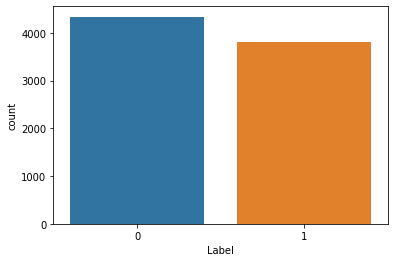

In [9]:
sns.countplot(x=data['Label']);

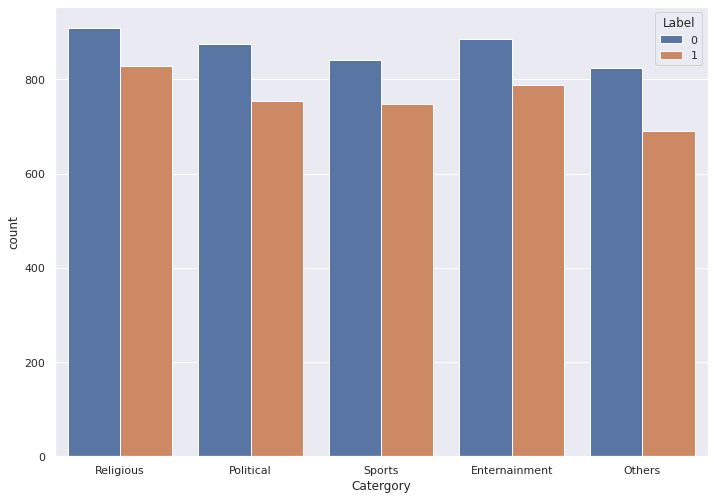

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=data, x="Catergory", hue="Label")

In [15]:
# Count of Texts in Each Category
counttxt = data.groupby('Catergory').count()['Data'].reset_index().sort_values(by='Data',ascending=False)
counttxt.style.background_gradient(cmap='Reds')

,Catergory,Data
3,Religious,1737
0,Enternainment,1673
2,Political,1630
4,Sports,1590
1,Others,1515


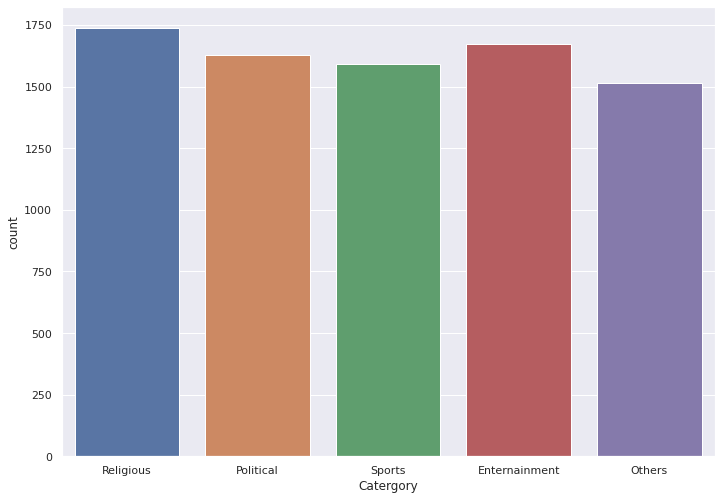

In [17]:
sns.countplot(x=data['Catergory']);

In [ ]:
y = data['Label']
X = data.drop('Label', axis=1)



In [ ]:
X

,Data,Catergory
0,আমার জয় মামা কে আল্লাহ পাক দুনিয়া ও আখেরাতে ...,Religious
1,আপেক্ষা কর ইসলাম ধর্ম কি বুঝতে পারবি,Religious
2,"তুদের ধর্ম আমরা জানি,,বলতে চাই অনেক কিছু আমাদে...",Religious
3,ইসলামের কথা আসলে তোমার এত চুলখানি কেন হয়?,Religious
4,"মুসলমান কি হয়েছে, উগ্রবাদী জঙ্গি মুসলিম দের বে...",Religious
...,...,...
8140,শালী মাগী একটা খাংকি রি‌জেক‌টেড মাল ।,Others
8141,অপুর মতো মাগীরা সেক্স এর জন্য সব করতে পারে মাগি,Others
8142,খানকি গুলোর ভালো পরিবার জোটে আর যারা ভালো তারা...,Others
8143,এই মেয়ে একটা খানকি মাগি ওদের মতো মাগীদের জন্য ...,Others


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8140    1
8141    1
8142    1
8143    1
8144    1
Name: Label, Length: 8145, dtype: int64

In [ ]:
X_train, X_testval, y_train, y_testval = train_test_split(X, y,test_size=0.3)

trainSet = pd.concat([X_train, y_train], axis=1)
# testvalSet = pd.concat([X_testval, y_testval], axis=1)

trainSet.to_csv("/content/drive/MyDrive/Final Project/Code/Dataset/Dataset_BHS_MJN_Train.csv", index = False)


In [ ]:
traindata =  pd.read_csv("/content/drive/MyDrive/Final Project/Code/Dataset/Dataset_BHS_MJN_Train.csv") 
traindata

,Data,Catergory,Label
0,গাড়ি উড়োজাহাজ আর হেলিকপটার তো খিরিসটানরা বানাই...,Religious,0
1,ওরে চা খাওয়ান সব ঠিক হয়ে যাবে??,Religious,0
2,আমার জাছে আয় চুদে তোর ভদার রস বের করে দিবো আয় ...,Political,1
3,"আপনি ভাল বলেছেন ,ও যদি আসতে চাই আপনি গ্রহণ করি...",Sports,0
4,আম্পায়ার এর ডিসিসনে সংসয় থাকলেও সেটা আগে দিত...,Sports,0
...,...,...,...
5696,গুড মারানী তোর কথার মধ্যে অনেক ফালতু কথা আছে এ...,Others,1
5697,দেশের পুটকি মারা শেষ।,Political,0
5698,"ভারতের রাজনিতি খুব জঘন্য, আসল কাহিনি জানা পর্য...",Political,0
5699,আপুর রিপ্লাই গুলো বেশি সুন্দর 😂😂একদম ঠিক কথা ব...,Others,0


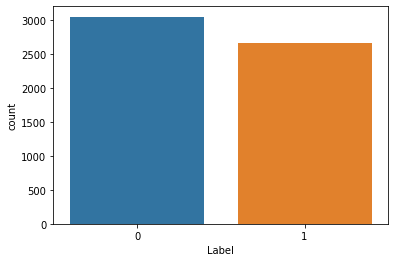

In [ ]:
sns.countplot(x=traindata['Label']);

In [ ]:
# print("\nX_train:\n")
# print(X_train.head())
# print(X_train.shape)

# print("\nX_test:\n")
# print(X_testval.head())
# print(X_testval.shape)

X_test, X_val, y_test, y_val = train_test_split(X_testval, y_testval,test_size=0.5)

testSet = pd.concat([X_test, y_test], axis=1)
valSet = pd.concat([X_val, y_val], axis=1)

testSet.to_csv("/content/drive/MyDrive/Final Project/Code/Dataset/Dataset_BHS_MJN_Test.csv", index = False)
valSet.to_csv("/content/drive/MyDrive/Final Project/Code/Dataset/Dataset_BHS_MJN_Validation.csv", index = False)

In [ ]:
testdata =  pd.read_csv("/content/drive/MyDrive/Final Project/Code/Dataset/Dataset_BHS_MJN_Test.csv") 
testdata

,Data,Catergory,Label
0,পরিমনী বাংলার মানুষের কাছে এক বড় পতিতার নাম,Enternainment,1
1,আসসালামু আলাইকুম ভাই অসংখ্য ধন্যবাদ আপনাকে সত্...,Religious,0
2,এই কুত্তার বাচ্চা তুই কি অলিপুরিকে চিনিস ? যাক...,Religious,1
3,সালমান মোক্তাদির ভক্ত করা তাদের দেখতে চাই হালা...,Enternainment,1
4,সব সহ্য করতে হবে!,Sports,0
...,...,...,...
1217,আল্লাহ্ শুধু অবসর দিছে যাতে এরা সত্যের দিকে ফে...,Religious,0
1218,যেই যাই বলুক দেশটা কিন্তু পুলিশ আর সরকারি চাকর...,Others,0
1219,সালা আবাল এই মেয়েকে ঘরে নিলে তোর মাঝে আর ওর মা...,Sports,1
1220,এডিটের মায়রে বাপ!!,Others,1


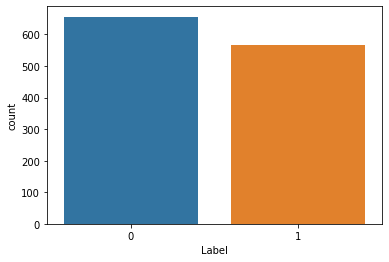

In [ ]:
sns.countplot(x=testdata['Label']);

In [ ]:
valdata =  pd.read_csv("/content/drive/MyDrive/Final Project/Code/Dataset/Dataset_BHS_MJN_Validation.csv") 
valdata

,Data,Catergory,Label
0,কাকা ফোন না ম্বার টা দিবেন,Religious,0
1,"যুগটা বিজ্ঞানের, গলাটা মৌলবাদের!",Religious,1
2,টাকা আমরা দিব,Enternainment,0
3,টাকলু হালা শেফুদর,Enternainment,1
4,আপনাদের নিউজের তারেক দিচ্ছেন না কেন,Political,0
...,...,...,...
1217,ভাই রে ভাই তুমাদের মতো সাংবাদিকের কথা জনগণ বিশ...,Political,0
1218,তর টা দেখেই বুঝাযাই তুই ভন্ডার ঘরের বন্ডা দেওয়...,Religious,1
1219,তুই মিয়া আবাল তুর বিয়ে করা বউ আর একজনের সাথে প...,Sports,1
1220,অভদ্র খেলা। ফুটবল,Sports,0


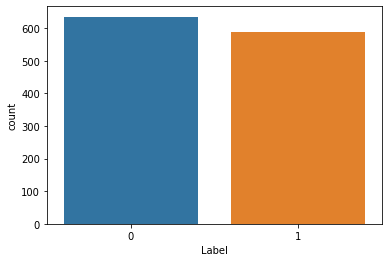

In [ ]:
sns.countplot(x=valdata['Label']);